<a href="https://colab.research.google.com/github/jsung0228/code/blob/main/Visualizing_Correlation_Table_Data_Analysis_with_Python_3_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#We will continue from the previous session on the minimum wage data and try to visualize the correlation between minimum wage across different states
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jsung0228/code/main/DataSets/Minimum%20Wage%20Data.csv', encoding="latin")

#First let's make a minimum wage table for each year for each states
act_min_wage = pd.DataFrame()
for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name}))


#Now let's get rid of any year where the minimum wage is equal to 0 by replacing the 0 with an NaN and dropping NA
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()
min_wage_corr.head(5)


,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,Indiana,Kentucky,Maine,Maryland,Massachusetts,Michigan,Minnesota,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,0.354060,-0.558293,0.642685,0.420479,0.618329,0.590455,-0.363881,-0.118830,0.701426,0.792106,0.645369,0.503251,0.803937,0.447145,-0.002115,-0.159050,0.278029,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,-0.049715,0.441958,0.192072,0.555619,0.116806,0.213170,0.496147,0.291749,-0.054490,-0.250984,0.111088,0.159904,-0.019945,0.343342,0.291886,0.383000,-0.310780,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,0.736715,-0.054002,0.804847,0.568976,0.957473,0.681970,-0.130918,0.372427,0.374463,0.350228,0.724435,0.596597,0.814327,0.322187,0.185905,0.232309,-0.427373,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,0.612062,0.474155,0.433139,0.321538,0.652008,0.318337,0.091370,0.760798,-0.012322,-0.236722,0.319119,0.351780,0.275604,0.110615,0.266788,0.483689,-0.763597,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,0.725477,-0.114716,0.715533,0.633147,0.901362,0.771777,-0.234686,0.291186,0.534085,0.420869,0.602805,0.584606,0.810524,0.546608,0.117157,0.077804,-0.411766,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


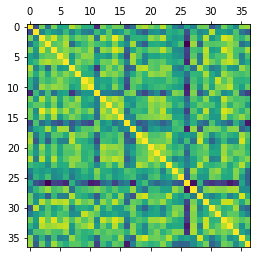

In [ ]:
plt.matshow(min_wage_corr)

[Text(0, 0, 'Al'),
 Text(0, 0, 'Ar'),
 Text(0, 0, 'Ca'),
 Text(0, 0, 'Co'),
 Text(0, 0, 'Co'),
 Text(0, 0, 'De'),
 Text(0, 0, 'Di'),
 Text(0, 0, 'Gu'),
 Text(0, 0, 'Ha'),
 Text(0, 0, 'Id'),
 Text(0, 0, 'In'),
 Text(0, 0, 'Ke'),
 Text(0, 0, 'Ma'),
 Text(0, 0, 'Ma'),
 Text(0, 0, 'Ma'),
 Text(0, 0, 'Mi'),
 Text(0, 0, 'Mi'),
 Text(0, 0, 'Ne'),
 Text(0, 0, 'Ne'),
 Text(0, 0, 'Ne'),
 Text(0, 0, 'Ne'),
 Text(0, 0, 'Ne'),
 Text(0, 0, 'Ne'),
 Text(0, 0, 'No'),
 Text(0, 0, 'No'),
 Text(0, 0, 'Oh'),
 Text(0, 0, 'Ok'),
 Text(0, 0, 'Or'),
 Text(0, 0, 'Pe'),
 Text(0, 0, 'Rh'),
 Text(0, 0, 'So'),
 Text(0, 0, 'Ut'),
 Text(0, 0, 'Ve'),
 Text(0, 0, 'Wa'),
 Text(0, 0, 'We'),
 Text(0, 0, 'Wi'),
 Text(0, 0, 'Wy')]

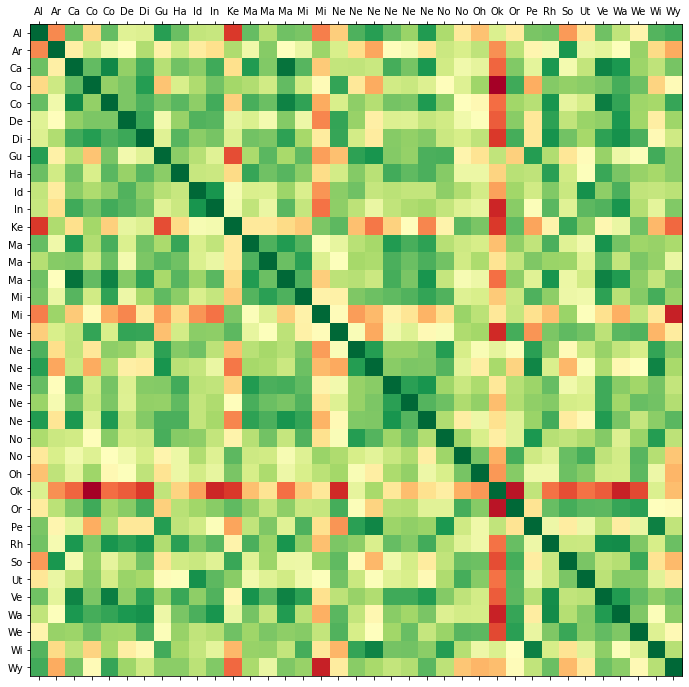

In [ ]:
#Let's fix some parts of the correlation graph - Further review matplotlib in other sessions

labels = [c[:2] for c in min_wage_corr.columns]
fig = plt.figure(figsize =(12,12))
ax=fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels))) #show them all
ax.set_yticks(np.arange(len(labels))) # show them all
ax.set_xticklabels(labels) # set it up with the abbv
ax.set_yticklabels(labels) # set it up with the abbv



So we can obviously see that there are state names that overlap, which isn't really useful. 

Thus, we must bringin a data tableset to change our abbreviations. 

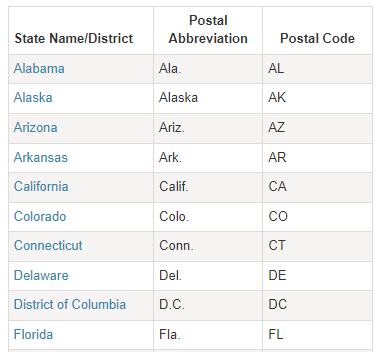

In [ ]:
#Bring in external datatables to change abbreviations
#Need to learn how to bring in html datatables

import pandas as pd

dfs = pd.read_html("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")
for df in dfs:
  print(df.head())


  State Name/District Postal Abbreviation Postal Code
0             Alabama                Ala.          AL
1              Alaska              Alaska          AK
2             Arizona               Ariz.          AZ
3            Arkansas                Ark.          AR
4          California              Calif.          CA
        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP


In [ ]:
state_abbv = pd.DataFrame()

state_abbv = dfs[0]
state_abbv.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [ ]:
state_abbv = state_abbv[["State Name/District","Postal Code"]].set_index("State Name/District").rename_axis(None)
state_abbv.head()

,Postal Code
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [ ]:
abbv_dict = state_abbv.to_dict()
abbv_dict = abbv_dict['Postal Code']
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

[Text(0, 0, 'AK'),
 Text(0, 0, 'AR'),
 Text(0, 0, 'CA'),
 Text(0, 0, 'CO'),
 Text(0, 0, 'CT'),
 Text(0, 0, 'DE'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'GU'),
 Text(0, 0, 'HI'),
 Text(0, 0, 'ID'),
 Text(0, 0, 'IN'),
 Text(0, 0, 'KY'),
 Text(0, 0, 'ME'),
 Text(0, 0, 'MD'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'MI'),
 Text(0, 0, 'MN'),
 Text(0, 0, 'NE'),
 Text(0, 0, 'NV'),
 Text(0, 0, 'NH'),
 Text(0, 0, 'NJ'),
 Text(0, 0, 'NM'),
 Text(0, 0, 'NY'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'ND'),
 Text(0, 0, 'OH'),
 Text(0, 0, 'OK'),
 Text(0, 0, 'OR'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'RI'),
 Text(0, 0, 'SD'),
 Text(0, 0, 'UT'),
 Text(0, 0, 'VT'),
 Text(0, 0, 'WA'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'WI'),
 Text(0, 0, 'WY')]

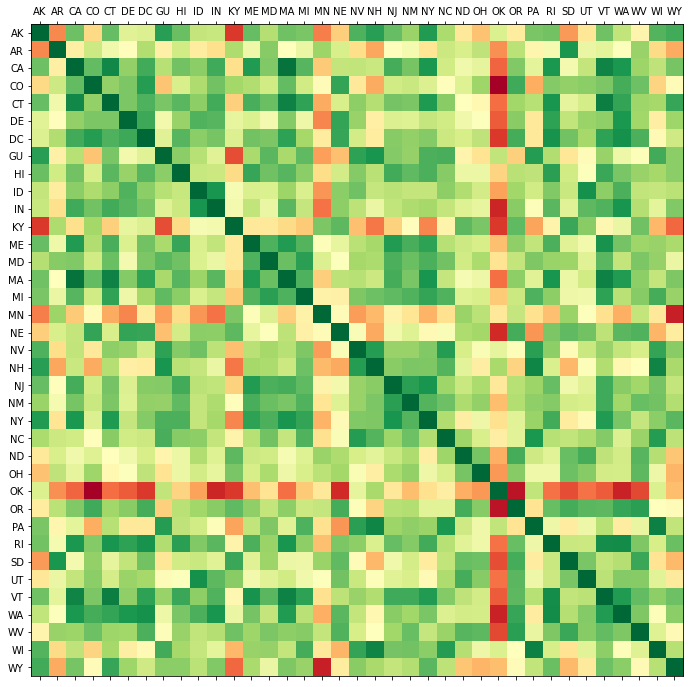

In [ ]:
abbv_dict['Guam'] = "GU"
abbv_dict['Puerto Rico'] = "PR"
abbv_dict['Federal (FLSA)'] = "FLSA"
labels = [abbv_dict[c] for c in min_wage_corr.columns] 
# labels = [state_abbv[c] for c in min_wage_corr.columns]

fig = plt.figure(figsize =(12,12))
ax=fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels))) #show them all
ax.set_yticks(np.arange(len(labels))) # show them all
ax.set_xticklabels(labels) # set it up with the abbv
ax.set_yticklabels(labels) # set it up with the abbv
